In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [486]:
df=pd.read_csv("C:\\Machstatz\\etl.csv")

In [487]:
df1=pd.read_csv("C:\\Machstatz\\RANGE-H.csv")
df1['START']=pd.to_datetime(df1['START'],dayfirst=True)

In [488]:
df['Time']=pd.to_datetime(df['Time'],dayfirst=True)

In [489]:
df1['END']=pd.to_datetime(df1['END'],dayfirst=True)

In [490]:
df.sort_index(inplace=True)
df1.sort_index(inplace=True)

In [491]:
new=df1

In [492]:
new.dtypes

START          datetime64[ns]
END            datetime64[ns]
TOTAL DELAY           float64
dtype: object

In [493]:
START = new['START']
END = new['END']
i=0  
df4=pd.DataFrame()
while i<len(new.index):
     mask = (df['Time']>START[i])&(df['Time']<=END[i])
     mydict['{}'.format(i)]=pd.DataFrame(df.loc[mask].mean())
     i+=1

In [494]:
for i in mydict.keys():
    mydict[i]=mydict[i].transpose()

In [495]:
mydict['1']

WI201B_PV_H_201_B_HOPPER_WGHT  WI201C_PV_H_201_C_HOPPER_WGHT  \
0                      40.805488                      41.868684   

   WI201D_PV_H_201_D_HOPPER_WGHT  PI201A_PV_A_DIGESTER_PRESSURE  \
0                      39.696892                       1.314128   

   WI201A_PV_H_201_A_HOPPER_WGHT  FIC202A_PV_MIX_ACID_FLOW_A_C_E_G  \
0                        41.1977                          9.932843   

   TIC201A_PV_MIX_ACID_TEMP_A_C_E_G  FI201_PV_STEAM_FLOW_DIGESTERS  \
0                              37.9                       0.228318   

   PIC212_PV_STEAM_PR_TO_DIGESTERS  FI205A_PV_STEAM_FLOW_E_201_A  \
0                         2.409024                         -0.01   

             ...              LI401B_PV_SA_B_D_401_B_LEVEL  \
0            ...                                  54.74936   

   LI401C_PV_SA_B_D_401_C_LEVEL  LI401D_PV_SA_B_D_401_D_LEVEL  \
0                     52.188256                     43.125519   

   LI403A_PV_WW_B_D_403_LEVEL  LI403B_PV_WW_B_D_403A_LEVEL  \
0                         0.0                    27.808874   

   LI603B_PV_RA_TANK_LEVEL_B  LI603C_PV_RA_TANK_LEVEL_C  \
0                  16.867682                  27.843974   

   LI604A_PV_MA_TANK_LEVEL_A  LI604B_PV_MA_TANK_LEVEL_B  \
0                  21.234437                  39.176689   

   LI604C_PV_MA_TANK_LEVEL_C  
0                        0.0  

[1 rows x 39 columns]

In [496]:
df4=pd.DataFrame()
for i in mydict.keys():
    df4=df4.append(mydict[i])

In [497]:
from pandas import ExcelWriter

writer = ExcelWriter('C:\\Machstatz\\RANGE-HH.xlsx')
df4.to_excel(writer,'Sheet5')
writer.save()


In [498]:
df5=pd.read_csv('C:\\Machstatz\\RANGE-HH.csv')

In [499]:
df5=df1.join(df5)

In [500]:
#exporting the data set 
writer = ExcelWriter('C:\\Machstatz\\RANGE--hh.xlsx')
df5.to_excel(writer,'Sheet5')
writer.save()

In [501]:
df6=pd.read_csv('C:\\Machstatz\\RANGE--hh.csv')

In [502]:
def plot_corr(df6,size=5):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

In [503]:
plot_corr(df6)

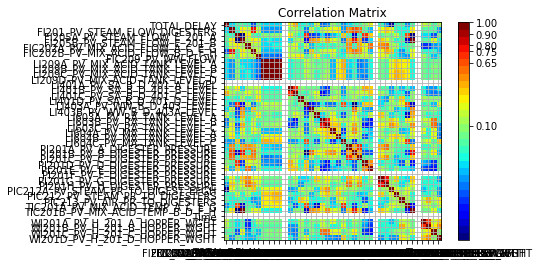

In [504]:
def correlation_matrix(df,size=5):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    corr = df.corr()
    ax1.grid(True)
    plt.title('Correlation Matrix')
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.65,.10,.75,.80,.90,1])
    plt.show()

correlation_matrix(df6)


In [505]:
df7=pd.DataFrame(df6.corr())

In [506]:
from pandas import ExcelWriter
writer = ExcelWriter('C:\\Machstatz\\CORELATION_MATRIX-H.xlsx')
df7.to_excel(writer,'Sheet5')
writer.save()

In [412]:
df5

START                 END  TOTAL DELAY  \
0  2018-01-31 08:15:00 2018-02-01 10:30:00         5.75   
1  2018-02-01 10:30:00 2018-02-02 14:45:00         7.50   
2  2018-02-02 14:45:00 2018-02-03 16:00:00         5.00   
3  2018-02-03 17:30:00 2018-02-04 17:00:00         4.75   
4  2018-02-04 17:00:00 2018-02-05 15:30:00         2.25   
5  2018-02-05 16:15:00 2018-02-06 14:30:00         2.25   
6  2018-02-06 14:30:00 2018-02-07 14:30:00         4.00   
7  2018-02-07 14:30:00 2018-02-08 13:15:00         2.25   
8  2018-02-08 13:15:00 2018-02-09 12:30:00         3.00   
9  2018-02-09 12:30:00 2018-02-10 08:45:00         0.00   
10 2018-02-10 04:15:00 2018-02-11 06:30:00         0.75   
11 2018-02-11 07:00:00 2018-02-11 03:15:00         0.50   
12 2018-02-11 03:05:00 2018-02-11 00:00:00         0.50   
13 2018-02-12 00:15:00 2018-02-13 21:25:00         2.75   
14 2018-02-13 23:15:00 2018-02-14 20:45:00         3.00   
15 2018-02-14 20:45:00 2018-02-16 09:45:00        16.75   
16 2018-02-16 11:00:00 2018-02-17 07:15:00         1.25   
17 2018-02-17 07:30:00 2018-02-17 03:45:00         0.25   
18 2018-02-17 03:45:00 2018-02-18 00:15:00         0.00   
19 2018-02-18 00:15:00 2018-02-19 21:00:00         0.75   
20 2018-02-19 21:00:00 2018-02-20 18:15:00         1.00   
21 2018-02-20 19:45:00 2018-02-21 16:45:00         2.25   
22 2018-02-21 17:15:00 2018-02-22 14:30:00         1.75   
23 2018-02-22 17:00:00 2018-02-23 14:15:00         3.50   
24 2018-02-23 15:00:00 2018-02-24 14:15:00         3.50   
25 2018-02-24 15:15:00 2018-02-26 21:30:00         2.25   
26 2018-02-26 21:30:00 2018-02-27 20:45:00         2.25   
27 2018-02-27 20:45:00 2018-02-28 19:45:00         2.50   

    FI201_PV_STEAM_FLOW_DIGESTERS  FI205A_PV_STEAM_FLOW_E_201_A  \
0                        0.990095                     -0.010000   
1                        0.647811                     -0.010000   
2                        0.038607                     -0.010000   
3                        0.672652                     -0.010000   
4                        0.420274                     -0.010000   
5                        0.740816                     -0.010000   
6                        0.567861                     -0.010000   
7                        0.818066                     -0.010000   
8                        0.648116                     -0.003532   
9                        0.732840                     -0.010000   
10                       0.620470                     -0.010000   
11                            NaN                           NaN   
12                            NaN                           NaN   
13                       0.609723                     -0.010000   
14                       0.684512                     -0.010000   
15                       0.131946                     -0.010000   
16                       0.703021                     -0.010000   
17                            NaN                           NaN   
18                       0.623355                     -0.010000   
19                       0.575885                     -0.010000   
20                       0.372871                     -0.010000   
21                       0.305008                     -0.010000   
22                       0.307043                      1.083129   
23                       0.515396                      1.876086   
24                       0.317082                      1.552932   
25                       0.099837                      0.819235   
26                       0.548373                      1.572029   
27                       0.665254                      1.623007   

    FI205B_PV_STEAM_FLOW_E_201_B  FIC202A_PV_MIX_ACID_FLOW_A_C_E_G  \
0                       2.315372                         18.392377   
1                       1.430832                         11.735221   
2                       1.091347                         10.164165   
3                       1.529199                         12.072057   
4          